In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MSIM/datasets/crash.csv')
df

,PassengerId,Age,Speed,Survived
0,1,22,65,0
1,2,38,50,1
2,3,26,45,1
3,4,35,55,1
4,5,35,85,0
5,6,26,117,0
6,7,54,68,0
7,8,12,72,0
8,9,27,46,1
9,10,32,71,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X = df[['Age','Speed']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
type(X['Age'])

pandas.core.series.Series

In [5]:
logmodel = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=True)
print(logmodel.summary())

Optimization terminated successfully.
         Current function value: 0.414719
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                   14
Model:                          Logit   Df Residuals:                       11
Method:                           MLE   Df Model:                            2
Date:                Sat, 20 Jan 2024   Pseudo R-squ.:                  0.4017
Time:                        20:34:01   Log-Likelihood:                -5.8061
converged:                       True   LL-Null:                       -9.7041
Covariance Type:            nonrobust   LLR p-value:                   0.02028
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3489      3.778      1.681      0.093      -1.055      13.753
Age            0.0340      0.

In [ ]:
predictions = logmodel.predict(sm.add_constant(X_test))
class_prediction = [1 if x>=0.5 else 0 for x in predictions]

In [ ]:
predictions

10    0.732858
18    0.013341
11    0.997261
9     0.108305
15    0.998953
0     0.195844
dtype: float64

In [ ]:
class_prediction

[1, 0, 1, 0, 1, 0]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, class_prediction))
print(confusion_matrix(y_test, class_prediction))

0.8333333333333334
[[2 0]
 [1 3]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

Text(0, 0.5, 'TP rate')

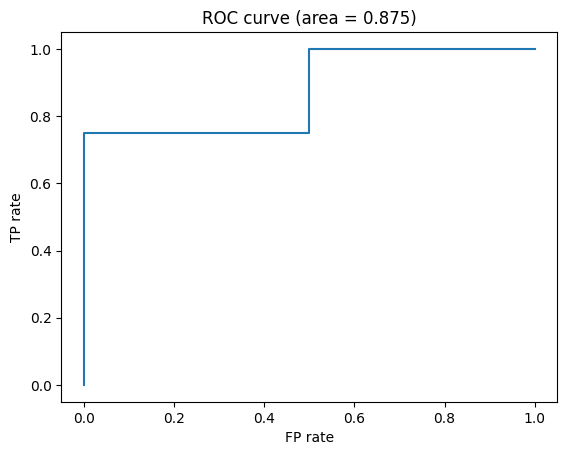

In [ ]:
plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' %roc_auc)
plt.title('ROC curve (area = %0.3f)' %roc_auc)
plt.xlabel('FP rate')
plt.ylabel('TP rate')